In [1]:
from geosnap import Community

## Data prep

In [2]:
dc = Community.from_lodes(state_fips="11", years=[2010, 2015])

In [3]:
dc_tracts = Community.from_census(state_fips="11", years=2010)

In [4]:
# tract level data from 2010, this is the source
tracts = dc_tracts.gdf

In [5]:
# block level data from 2015, this is the target
blocks = dc.gdf[dc.gdf.year == 2015]

In [6]:
# original block-level data for 2010, this is the ground truth
test = dc.gdf[dc.gdf.year == 2010]

In [7]:
# rename this variable so its the same on blocks/tracts
tracts["population"] = tracts["n_total_pop"]

In [8]:
# community with mixed geoms
hybrid = Community.from_geodataframes([blocks, tracts])

## Harmonizing a community with areal interpolation

In [9]:
# this wil take the 2010 tract data and interpolate it to 2015 boundaries (the same as 2010)
# using pure area interpolation here

hybrid_area = hybrid.harmonize(2015, extensive_variables=["population"])

## Harmonizing a community with areal interpolation and auxiliary data

In [10]:
# this will do the same as above, but will use 2011 NLCD data to constrain the overlay to what's considered developed land

hybrid_raster = hybrid.harmonize(
    2015, extensive_variables=["population"], weights_method="land_type_area", raster='../nlcd_2011.tif'
)

/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/tobler/area_weighted/area_weighted.py:482: UserWarning: The CRS for the generated union will be set 

In [11]:
interpolated_area = hybrid_area.gdf[hybrid_area.gdf.year == 2010]
interpolated_raster = hybrid_raster.gdf[hybrid_raster.gdf.year == 2010]

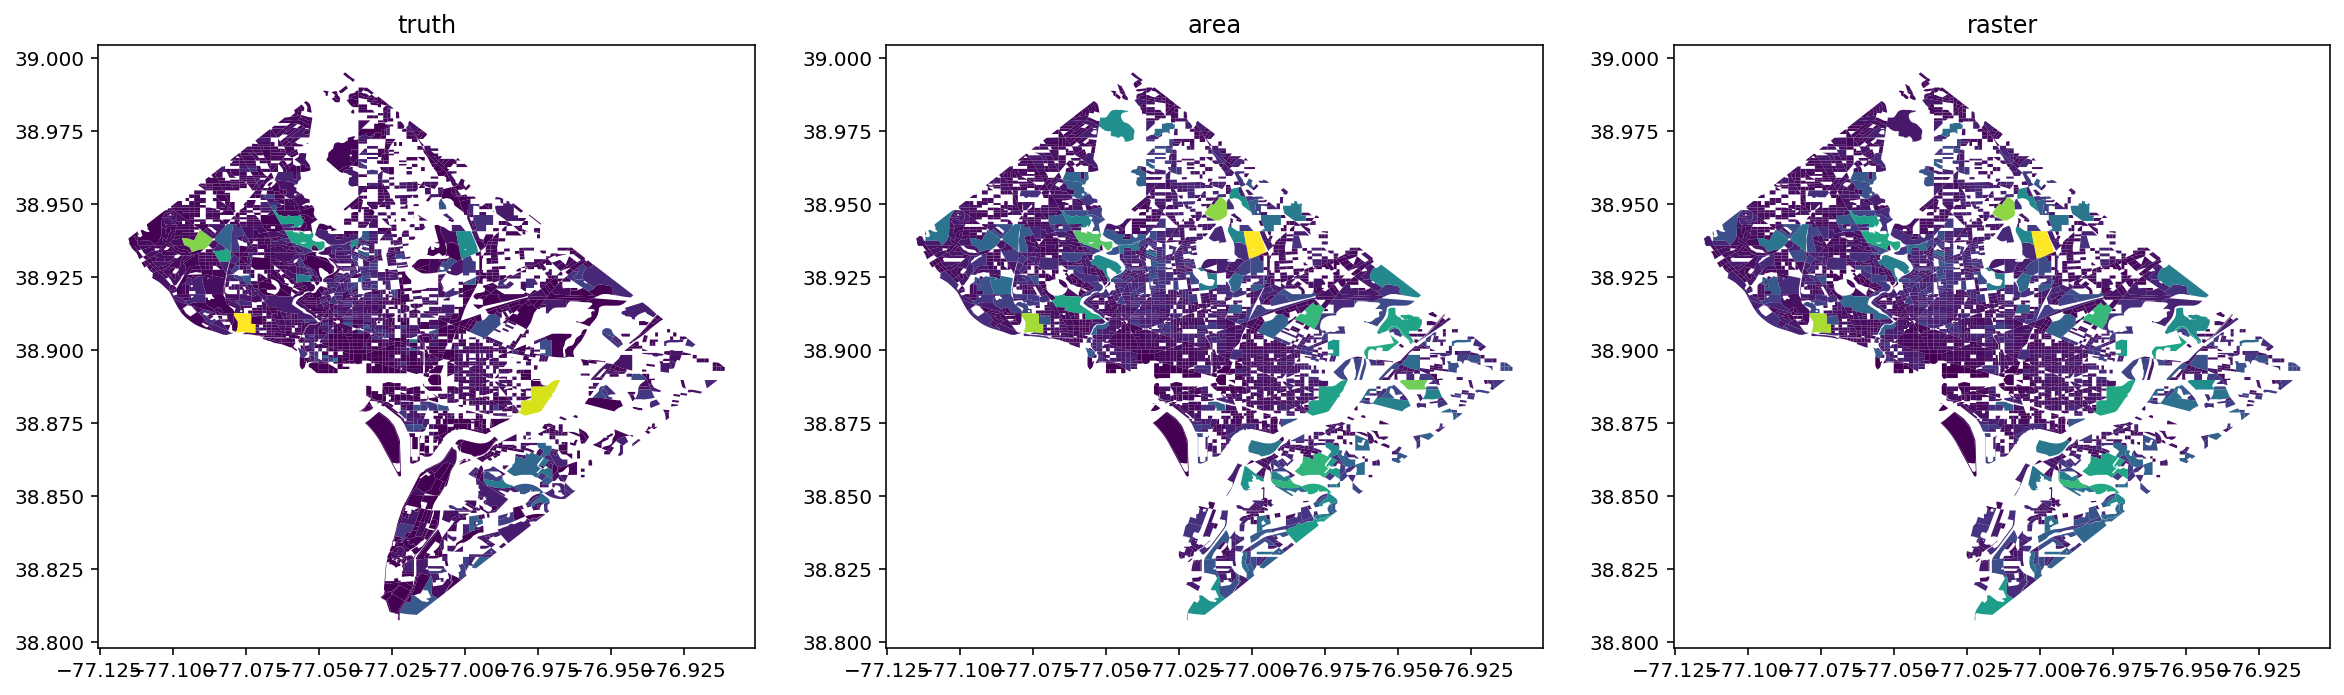

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(20, 8))
titles = ["truth", "area", "raster"]
for i, data in enumerate([test, interpolated_area, interpolated_raster]):
    data.plot("population", ax=axs[i])
    axs[i].set_title(titles[i])

count    2972.000000
mean      -64.920946
std       349.157335
min     -3220.932581
25%      -153.752782
50%       -47.376116
75%        40.783046
max      3618.364054
Name: population, dtype: float64

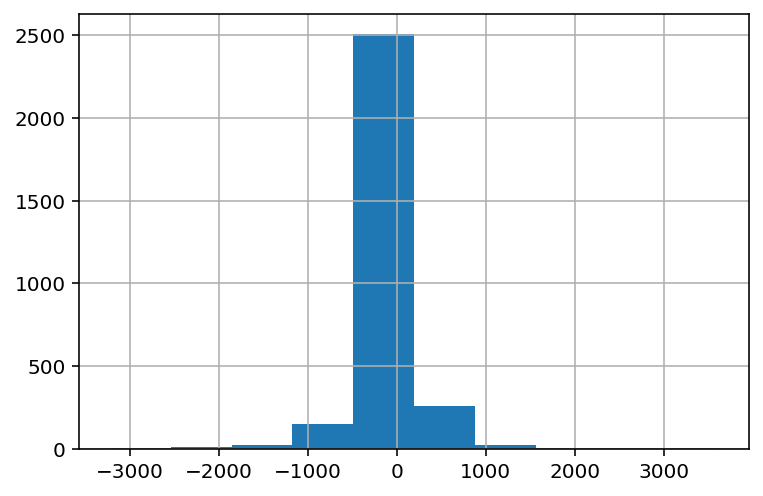

In [13]:
diff = test.population - interpolated_area.population

diff.hist()
diff.describe()

count    2972.000000
mean      -64.857111
std       337.507961
min     -3188.934689
25%      -159.655217
50%       -50.393351
75%        37.842331
max      3621.922652
Name: population, dtype: float64

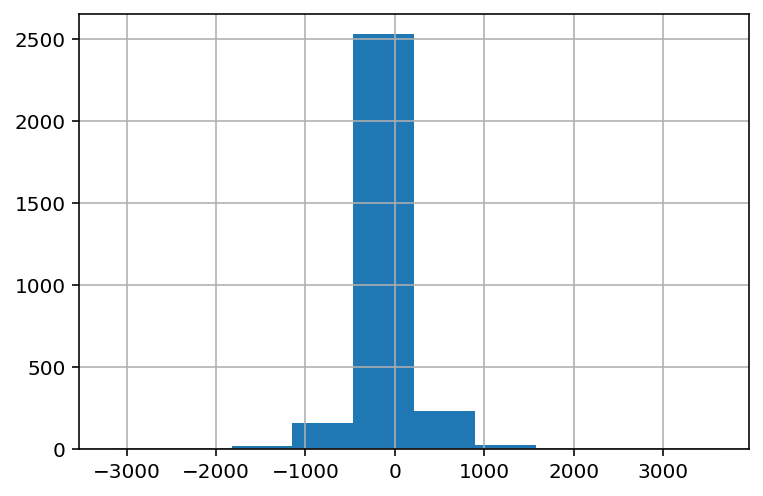

In [14]:
diff = test.population - interpolated_raster.population

diff.hist()
diff.describe()